# Data Preparation and Customer Analysis Python Notebook

Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

https://www.insidesherpa.com/virtual-internships/prototype/NkaC7knWtjSbi6aYv/Data-Analytics

## Task 1:

### Examine transaction data
* insconsistencies?
* null data?
* numeric data?
* clean data is a must
* merge the data
* Its then time to analyse

### Data to look at and metrics to define
* total sales
* drivers of sales
* highest sales come from

### To do
* charts
* graphs
* interesting trends?

### To find through the data
* Which customer segments to target?
* Chips packet size
* Over conclusion based on analysis

## 1. Problem
Conduct analysis on client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

## 2. Data
Data provided by Inside Sherpa and Quantium

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string as st
from string import digits

In [2]:
# QVI_purchase_behavior dataset
purchase_behavior = pd.read_csv("purchase_behaviour.csv")
purchase_behavior.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
# QVI_transaction_data dataset
transaction_data = pd.read_csv("qvi_transaction_data.csv")
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6
2,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,3
3,8/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15
4,8/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,14


#### Examining Data

In [4]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

No null data

----------

In [5]:
mergedata = pd.merge(purchase_behavior, transaction_data)
mergedata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,10/17/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6
1,1002,YOUNG SINGLES/COUPLES,Mainstream,9/16/2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,3
2,1003,YOUNG FAMILIES,Budget,3/7/2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,4
3,1003,YOUNG FAMILIES,Budget,3/8/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3
4,1004,OLDER SINGLES/COUPLES,Mainstream,11/2/2018,1,5,96,WW Original Stacked Chips 160g,1,2


Datasets are merged

----------

In [6]:
# Groupby DATE needed, so finding the length of DATE to see if groupby worked later
len(transaction_data["DATE"])

264836

Finding the lenght of Date to see if groupby is successful later

----------

In [7]:
transaction_data["PROD_NAME"].head()

0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S/Cream&Onion 175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
Name: PROD_NAME, dtype: object

PROD_NAME cloumn needs to be changed, has both Product name and package size(g)

----

In [8]:
# Creating new date frame with total sales grouped by date
date_sales = transaction_data["TOT_SALES"].groupby(transaction_data["DATE"])
print(date_sales.sum())
# Data frame
date_sales_df = pd.DataFrame(date_sales.sum())
date_sales_df.head()

DATE
1/1/2019     5023
1/10/2019    5315
1/11/2019    5036
1/12/2019    5344
1/13/2019    5108
             ... 
9/5/2018     5524
9/6/2018     5863
9/7/2018     5189
9/8/2018     5346
9/9/2018     5596
Name: TOT_SALES, Length: 364, dtype: int64


,TOT_SALES
DATE,
1/1/2019,5023
1/10/2019,5315
1/11/2019,5036
1/12/2019,5344
1/13/2019,5108


In [9]:
# Changing the PROD_NAME column to only display numbers that represent the package size
transaction_data['Package Size'] = transaction_data['PROD_NAME'].str.replace(r'[^\d.]+', '')

# Total sales grouped by PROD_NAME
new_sales = transaction_data["TOT_SALES"].astype(int).groupby(transaction_data["Package Size"].rename("Package Size").astype(int))
# Total Sales mean by package size
print(new_sales.mean())
# Data Frame new_sales.mean
df_sales = pd.DataFrame(new_sales.mean())
df_sales.head()

Package Size
70      4.674187
90      2.906915
110     7.649529
125     3.756534
134     6.749143
135     7.632484
150     6.922932
160     3.773737
165     6.502451
170     7.500125
175     7.416569
180     5.650545
190     5.155927
200     3.767047
210     6.724330
220     4.683504
250     8.566740
270     8.675577
300     7.345378
330    10.577751
380    12.064194
Name: TOT_SALES, dtype: float64


,TOT_SALES
Package Size,
70,4.674187
90,2.906915
110,7.649529
125,3.756534
134,6.749143


In [10]:
# Total sales grouped by store number
store_sales = transaction_data["TOT_SALES"].astype(int).groupby(transaction_data["STORE_NBR"].astype(int))
print(store_sales.sum())
# Data frame
store_sales = pd.DataFrame(store_sales.sum())
store_sales.head()

STORE_NBR
1       2425
2       2043
3      12790
4      14658
5       9459
       ...  
268     2629
269    11212
270    11247
271     9692
272     4646
Name: TOT_SALES, Length: 272, dtype: int32


,TOT_SALES
STORE_NBR,
1,2425
2,2043
3,12790
4,14658
5,9459


In [11]:
transaction_data["PROD_QTY"].max()

200

In [12]:
transaction_data[transaction_data["PROD_QTY"] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Package Size
69762,8/19/2018,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650,380
69763,5/20/2019,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650,380


Looks like customer 226201 has bought 200 packets of Dorito Corn Chp Supreme 380g two times. Once on 8/19/2018, and onces on 5/20/2019.
* **It would seem, he is not a real customer, rather a re-seller of the chips**

## 3. Visualizations

###### QVI_purchase_behavior dataset

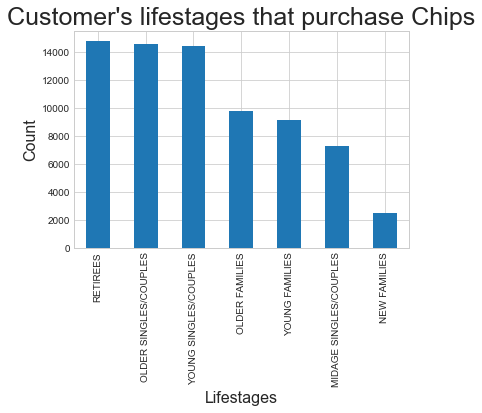

In [13]:
# Customer of Chips' Lifestages

# Using seaborn-whitegrid
plt.style.use("seaborn-whitegrid")

# Bar plot
fig, ax = plt.subplots()
purchase_behavior['LIFESTAGE'].value_counts().plot(kind='bar');
ax.set(title = "Customer's lifestages that purchase Chips",
      xlabel = "Lifestages",
      ylabel = "Count");
ax.title.set_size(25);
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16);

In [14]:
fig.savefig("img/Lifestages-and-purchases.png")

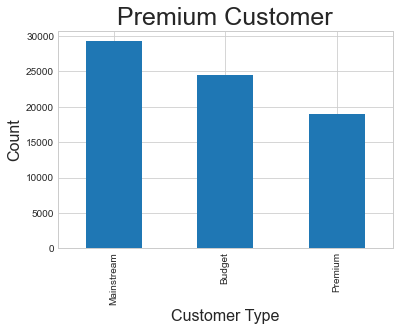

In [15]:
# Premium Customer
fig, ax = plt.subplots()
purchase_behavior["PREMIUM_CUSTOMER"].value_counts().plot(kind = "bar");
ax.set(title = "Premium Customer",
      xlabel = "Customer Type",
      ylabel = "Count");
ax.title.set_size(25)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16);

In [16]:
fig.savefig("img/Premium-customer.png")

##### QVI_transaction_data dataset

In [17]:
# Change Style
plt.style.use('seaborn-white')

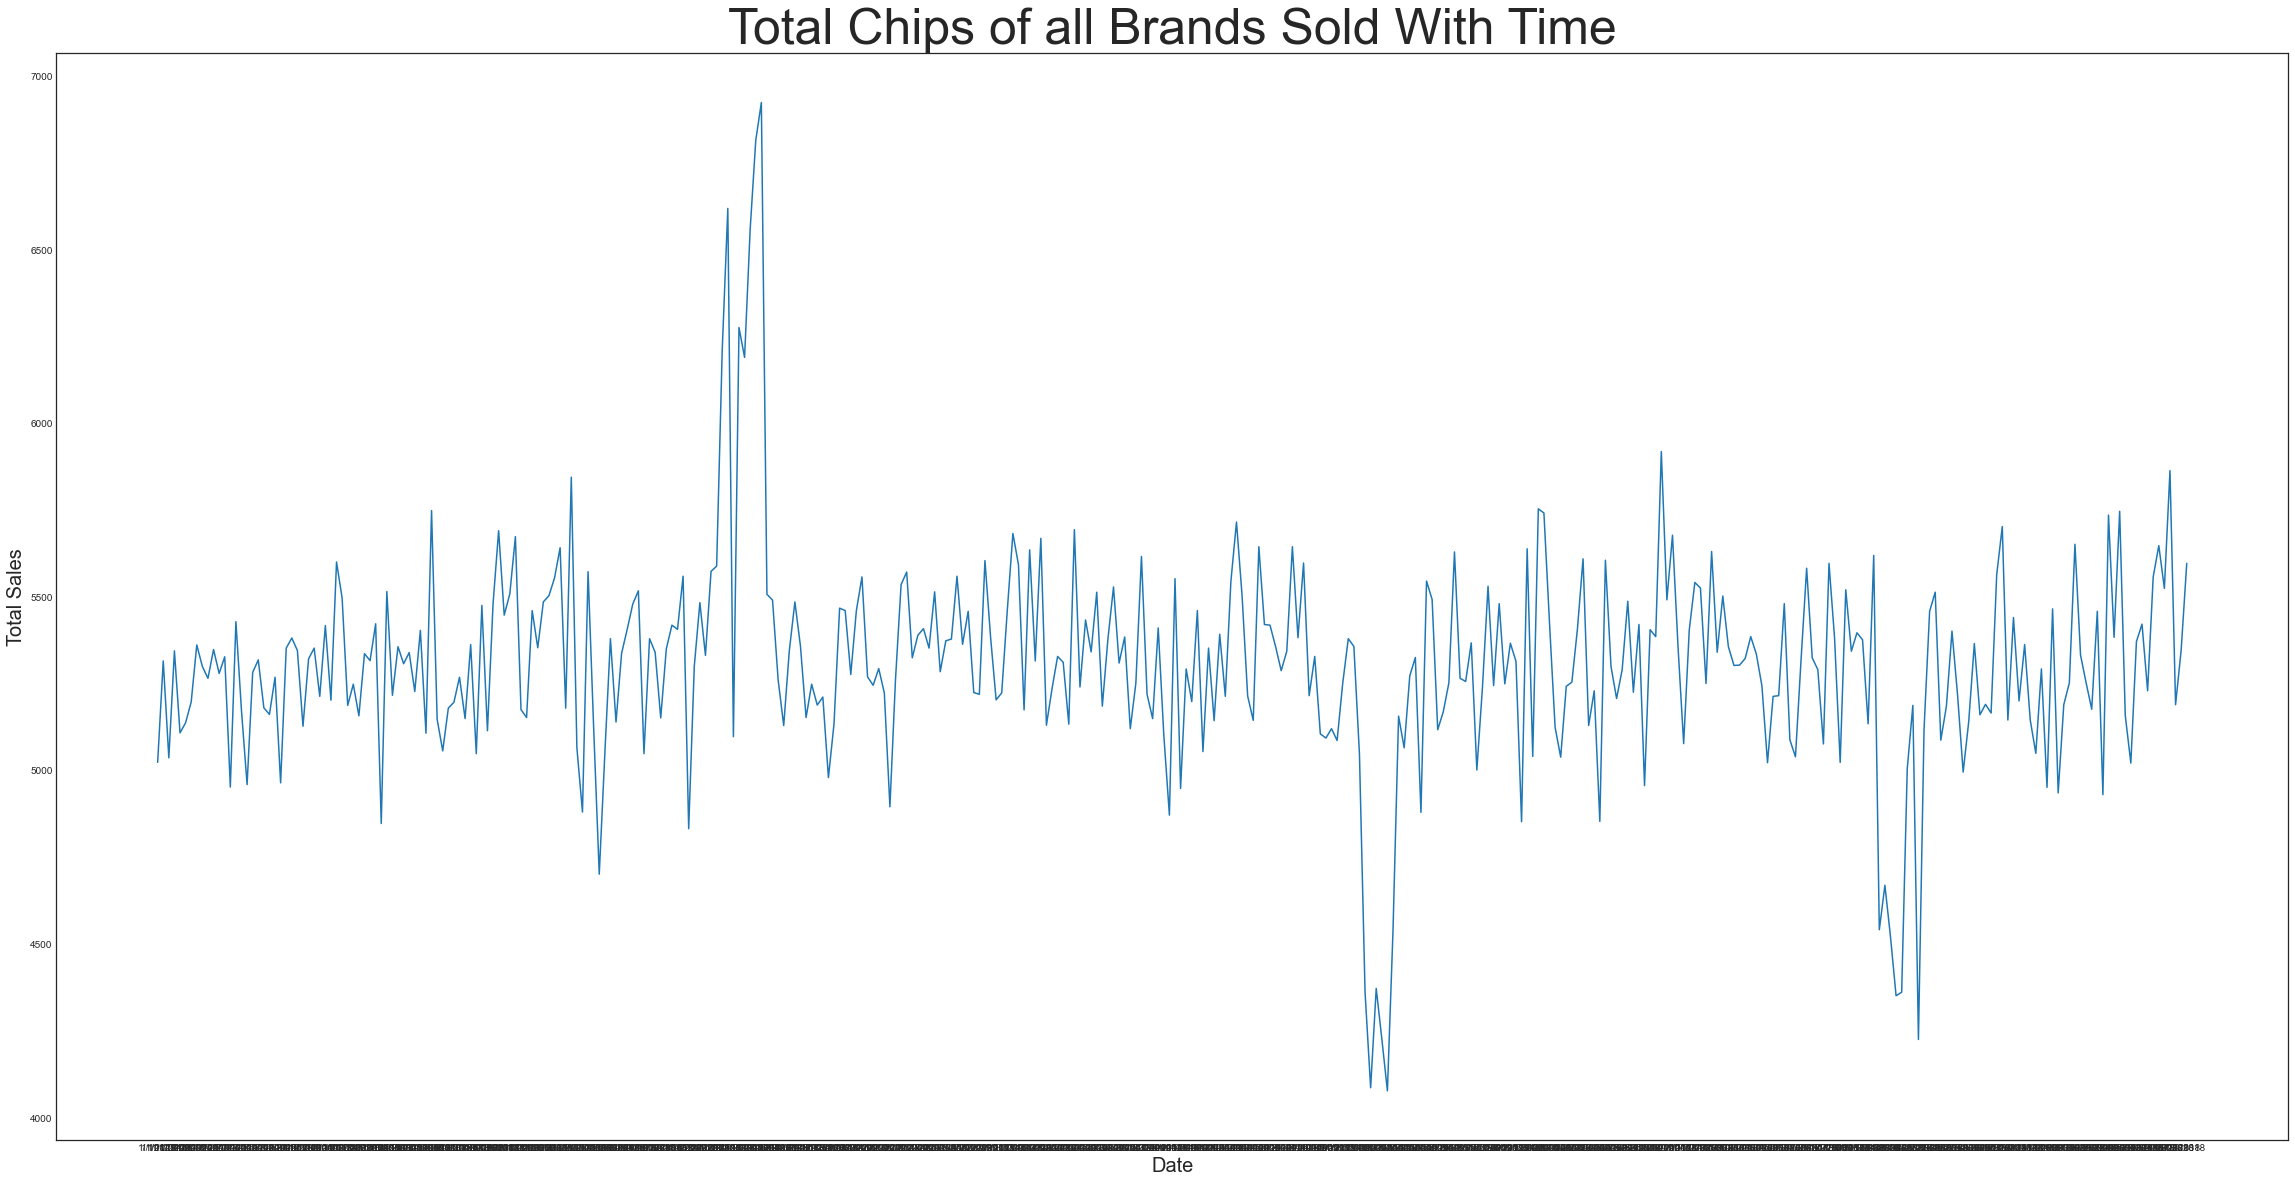

In [18]:
# total sales of chips from all stores and all brands as time passed
fig, ax = plt.subplots(figsize = (40,20))
ax.plot(date_sales_df);
ax.set(title = "Total Chips of all Brands Sold With Time",
      xlabel = "Date",
      ylabel = "Total Sales");
ax.title.set_size(50)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20);

In [19]:
fig.savefig("img/Total-chips-sold-reference-time.png")

Christmas time saw the most number of chips sales

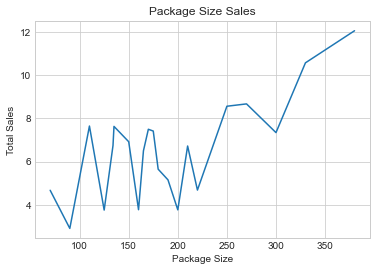

In [20]:
# Mean sold by package size plot
plt.style.use('seaborn-whitegrid')
plt.plot(df_sales);
plt.rcParams["figure.figsize"] = [5,30]
plt.xlabel('Package Size')
plt.ylabel('Total Sales')
plt.title('Package Size Sales');

In [21]:
fig.savefig("img/Package-size-total-sales.png")

-----

In [22]:
df_sales.loc[df_sales['TOT_SALES'].idxmax()]

TOT_SALES    12.064194
Name: 380, dtype: float64

package size 380 grams is most sold chips package size

-------

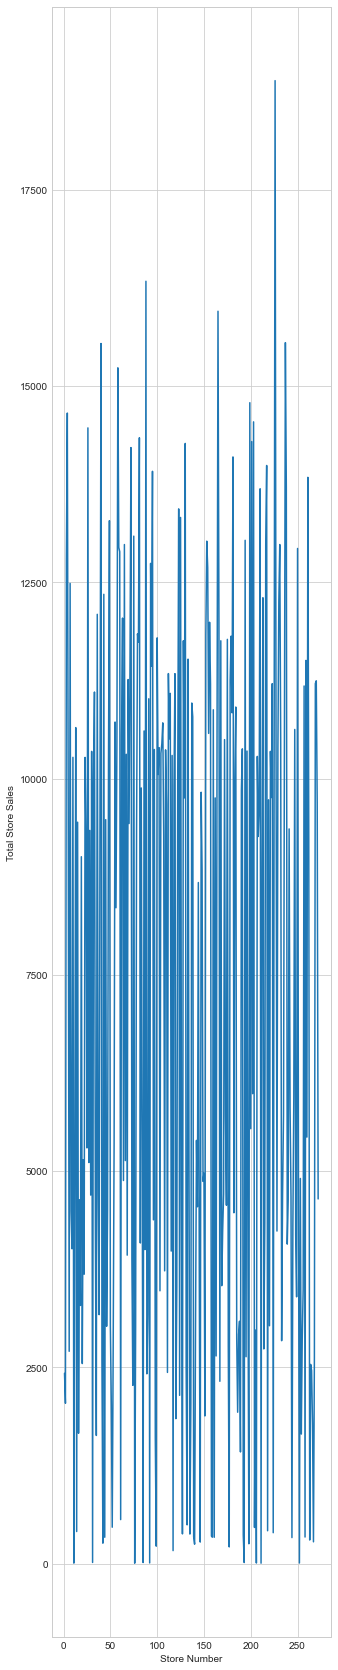

In [23]:
plt.plot(store_sales);
plt.rcParams["figure.figsize"] = [30,5];
plt.xlabel('Store Number')
plt.ylabel('Total Store Sales');

In [24]:
fig.savefig("img/Store-with-the-most-sales.png")

-----

In [25]:
store_sales.loc[store_sales['TOT_SALES'].idxmax()]

TOT_SALES    18893
Name: 226, dtype: int32

Store 226 had the most number of chips sales over the time period (18893)

__
----

## Task 2:

1. Select control stores – explore the data and define metrics for your control store selection – think about what would make  them a control store. Look at the drivers and make sure you visualise these in a graph to better determine if they are suited. For this piece it may even be worth creating a function to help you. 

2. Assessment of the trial – this one should give you some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. We want to know if the trial stores were successful or not. 

3. Collate findings – summarise your findings for each store and provide an recommendation that we can share with Julia outlining the impact on sales during the trial period.

## 1. Problem

* Julia has asked us to evaluate the performance of a store trial which was performed in stores 77, 86 and 88.
* Test the impact of the new trial layouts with a data driven recommendation to whether or not the trial layout should be rolled out to all their stores.

#### Control Store:
Pick a store that has similar performance to the trial stores
1. Monthly overall sales revenue, monthly number of customers and monthly number of transactions per customer
2. Stores must have sales every month over July 2018 to June 2019


###### Previous Merged Dataset

In [26]:
# Using PROD_NAME to create Package Size as integer
mergedata['Package Size'] = mergedata['PROD_NAME'].str.replace(r'[^\d.]+', '')
mergedata['Package Size'] = mergedata['Package Size'].astype(int)

# Droping PROD_NAME column
mergedata.drop(['PROD_NAME'], axis=1, inplace=True)
mergedata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Package Size
0,1000,YOUNG SINGLES/COUPLES,Premium,10/17/2018,1,1,5,2,6,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,9/16/2018,1,2,58,1,3,150
2,1003,YOUNG FAMILIES,Budget,3/7/2019,1,3,52,1,4,210
3,1003,YOUNG FAMILIES,Budget,3/8/2019,1,4,106,1,3,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,11/2/2018,1,5,96,1,2,160


In [27]:
# Formating Date column
mergedata['DATE'] = pd.to_datetime(mergedata['DATE'], format="%m/%d/%Y")
mergedata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Package Size
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,2,6,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,1,3,150
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,1,4,210
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,1,3,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,1,2,160


In [28]:
new_date_sales = mergedata["TOT_SALES"].groupby(mergedata["DATE"])
new_date_sales = pd.DataFrame(new_date_sales.sum())
new_date_sales.head()

,TOT_SALES
DATE,
2018-07-01,5353
2018-07-02,5303
2018-07-03,5318
2018-07-04,5290
2018-07-05,5076


##### Max chips sales on specfic date

In [29]:
new_date_sales.loc[new_date_sales['TOT_SALES'].idxmax()]

TOT_SALES    6923
Name: 2018-12-24 00:00:00, dtype: int64

In [30]:
new_nbr = mergedata["TOT_SALES"].groupby(mergedata["STORE_NBR"])
new_nbr = pd.DataFrame(new_nbr.sum())
new_nbr

,TOT_SALES
STORE_NBR,
1,2425
2,2043
3,12790
4,14658
5,9459
...,...
268,2629
269,11212
270,11247


##### Store that has the most sales revenue

In [31]:
new_nbr.loc[new_nbr['TOT_SALES'].idxmax()]

TOT_SALES    18893
Name: 226, dtype: int64

#### Control Strores

In [32]:
new_nbr["TOT_SALES"].mean()

7101.25

So the average sales revenue = 7101.25. Try to find the stores with sales directly below and above the mean

In [33]:
# Plotting to find values right below the mean

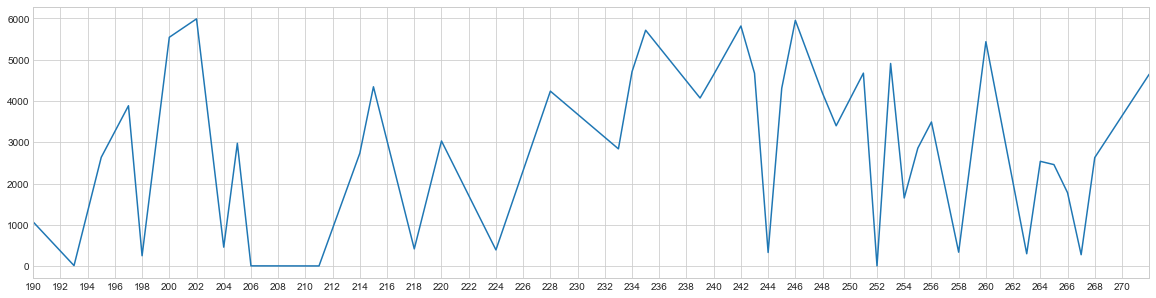

In [34]:
new_nbr_mean_plot = new_nbr[new_nbr["TOT_SALES"] <= 7000]
fig, ax = plt.subplots(figsize = (20,5))
plt.plot(new_nbr_mean_plot)
plt.xlim(190, 272)
ax.xaxis.set_ticks(np.arange(190,272,2));

Stores that are below and closest to the sales avg = 202, 246

In [35]:
df_202_old = pd.DataFrame(transaction_data, columns = ["STORE_NBR", "TOT_SALES"])
df_202_old = df_202_old[df_202_old['STORE_NBR'] == 202]
print(df_202_old.head())
df_246_old = pd.DataFrame(transaction_data, columns = ["STORE_NBR", "TOT_SALES"])
df_246_old = df_246_old[df_246_old['STORE_NBR'] == 246]
print(df_246_old.head())

      STORE_NBR  TOT_SALES
3758        202          9
3759        202          9
3760        202          7
3761        202         11
3762        202          9
      STORE_NBR  TOT_SALES
179         246          4
180         246          4
4581        246          8
4582        246          9
4583        246          9


In [36]:
df_202 = df_202_old
df_246 = df_246_old

In [37]:
# Plotting to find valies right above the mean

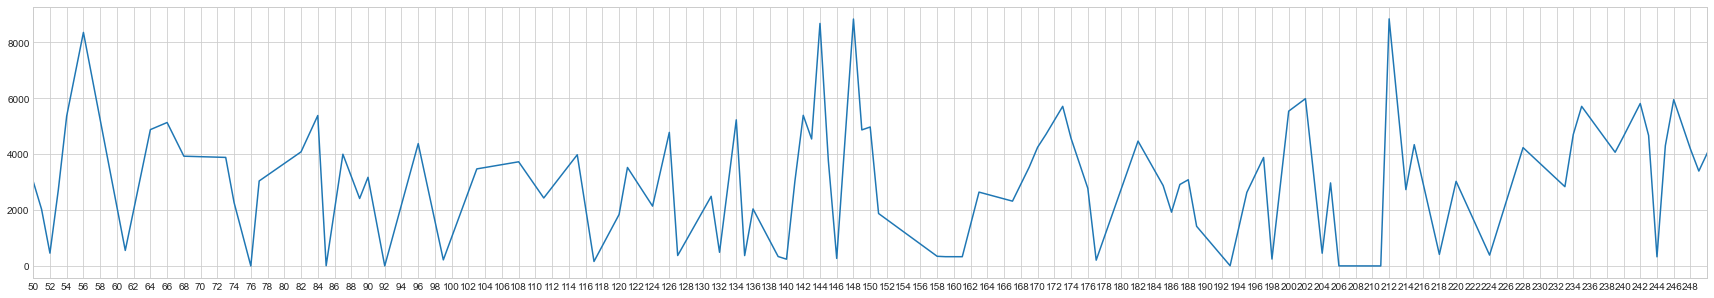

In [38]:
new_nbr_mean_plot = new_nbr[new_nbr["TOT_SALES"] <= 9000]
fig, ax = plt.subplots(figsize = (30,5))
plt.plot(new_nbr_mean_plot)
plt.xlim(50, 250)
ax.xaxis.set_ticks(np.arange(50,250,2));

Stores that are above and closest to the sales avg = 56, 144, 148, 212

In [39]:
df_56_old = pd.DataFrame(transaction_data, columns = ["STORE_NBR", "TOT_SALES"])
df_56_old = df_56_old[df_56_old['STORE_NBR'] == 56]
print(df_56_old.head())
df_144_old = pd.DataFrame(transaction_data, columns = ["STORE_NBR", "TOT_SALES"])
df_144_old = df_144_old[df_144_old['STORE_NBR'] == 144]
print(df_144_old.head())
df_148_old = pd.DataFrame(transaction_data, columns = ["STORE_NBR", "TOT_SALES"])
df_148_old = df_148_old[df_148_old['STORE_NBR'] == 148]
print(df_148_old.head())
df_212_old = pd.DataFrame(transaction_data, columns = ["STORE_NBR", "TOT_SALES"])
df_212_old = df_212_old[df_212_old['STORE_NBR'] == 212]
print(df_212_old.head())

      STORE_NBR  TOT_SALES
44           56          3
1082         56          5
1083         56          9
1084         56          7
1085         56          7
      STORE_NBR  TOT_SALES
2751        144          9
2752        144         11
2753        144          9
2754        144          8
2755        144          4
      STORE_NBR  TOT_SALES
2792        148          9
2793        148          9
2794        148          5
2795        148          5
2796        148          7
      STORE_NBR  TOT_SALES
155         212          4
156         212          4
157         212          3
3931        212          4
3932        212          7


In [40]:
df_56 = df_56_old
df_144 = df_144_old
df_148 = df_148_old
df_212 = df_212_old

##### Monthly Sales Revenue

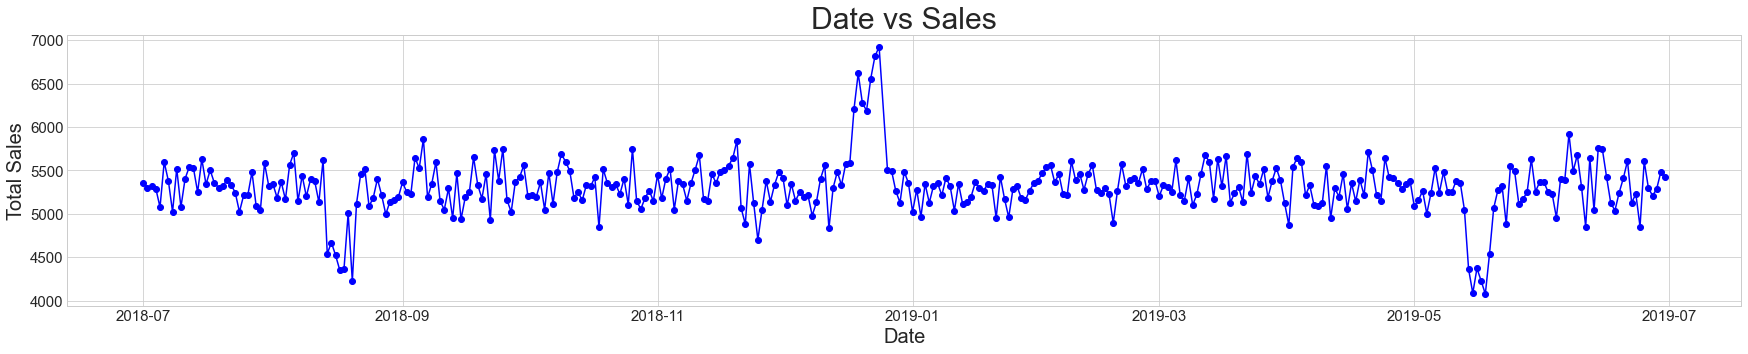

In [41]:
fig, ax = plt.subplots()
plt.plot(new_date_sales, 'bo-');
ax.set(title = "Date vs Sales",
      xlabel = "Date",
      ylabel = "Total Sales")
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(30)

##### Store Number with sales revenue

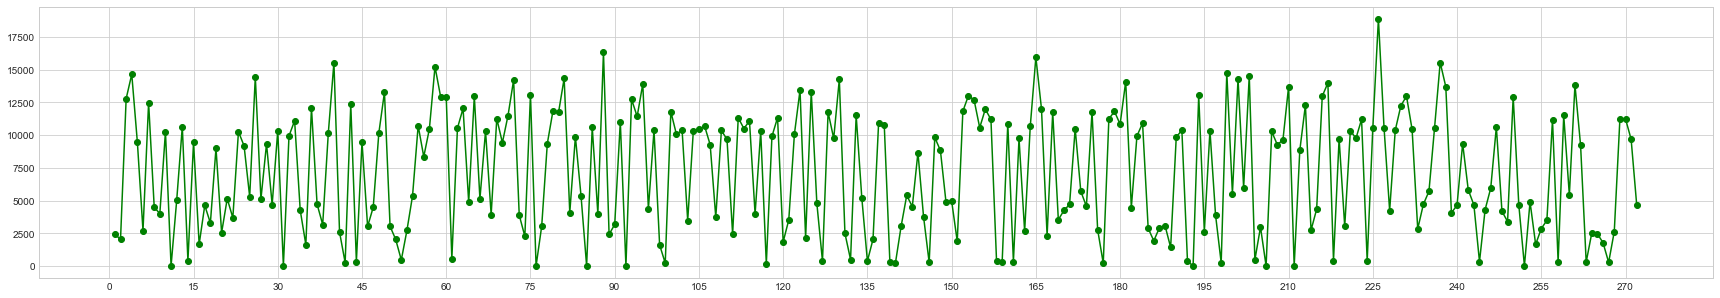

In [42]:
fig, ax = plt.subplots()
plt.plot(new_nbr, 'go-');
plt.xticks(np.arange(0, 273, 15));

## 2. Data

In [43]:
# task 2 data upload
taskdata = pd.read_csv("QVI_data.csv", encoding = 'utf-8')
# Modify dataset
taskdata.drop(['PROD_NAME'], axis = 1, inplace = True)
taskdata["DATE"] = taskdata["DATE"].astype(str)
taskdata["DATE"] = pd.to_datetime(taskdata['DATE'], format="%Y/%m/%d")
taskdata.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [44]:
taskdata.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


---------------

##### total sales revenue

In [45]:
total_sales_revenue = taskdata.TOT_SALES.sum()
total_sales_revenue

1933114.9999999998

##### find the total number of customers

the total number of customer can be found and is equal to the max value in the LYLTY_CARD_NBR number

In [46]:
total_customers = taskdata["LYLTY_CARD_NBR"].max()
total_customers

2373711

##### find the average transaction per customer

count of the loyalty card number will give the number of transactions

In [47]:
count_customers = taskdata["LYLTY_CARD_NBR"].count()
count_customers

264834

average transaction per customer in the dataset

In [48]:
transaction_avg  = total_customers/count_customers
print(transaction_avg)

8.963014567615941


------------

In [49]:
taskdata.loc[taskdata['TOT_SALES'].idxmax()]

LYLTY_CARD_NBR                    24095
DATE                2018-08-17 00:00:00
STORE_NBR                            24
TXN_ID                            20797
PROD_NBR                             14
PROD_QTY                              5
TOT_SALES                          29.5
PACK_SIZE                           380
BRAND                            SMITHS
LIFESTAGE                      RETIREES
PREMIUM_CUSTOMER                Premium
Name: 20349, dtype: object

------------------

### Julia has asked us to evaluate the performance of a store trial which was performed in stores 77, 86 and 88.
##### Using task 1 dataset: transaction data

##### Store 77

In [50]:
store_77_old = transaction_data["TOT_SALES"].astype(int).groupby(transaction_data["STORE_NBR"] == 77)
print(store_77_old.sum())

STORE_NBR
False    1928495
True        3045
Name: TOT_SALES, dtype: int32


Old Configuration Store 77 Sales Revenue = 3045

In [51]:
store_77 = taskdata["TOT_SALES"].astype(int).groupby(taskdata["STORE_NBR"] == 77)
print(store_77.sum())

STORE_NBR
False    1810389
True        2785
Name: TOT_SALES, dtype: int32


New Configuration Store 77 Sales Revenue = 2785

##### Old Config Store 77 Sales > New Config Store 77 Sales

##### Store 86

In [52]:
store_86_old = transaction_data["TOT_SALES"].astype(int).groupby(transaction_data["STORE_NBR"] == 86)
print(store_86_old.sum())

STORE_NBR
False    1920932
True       10608
Name: TOT_SALES, dtype: int32


Old Configuration Store 86 Sales Revenue = 10608

In [53]:
store_86 = taskdata["TOT_SALES"].astype(int).groupby(taskdata["STORE_NBR"] == 86)
print(store_86.sum())

STORE_NBR
False    1803181
True        9993
Name: TOT_SALES, dtype: int32


New Configuration Store 86 Sales Revenue = 9993

##### Old Config Store 86 Sales > New Config Store 86 Sales

##### Store 88

In [54]:
store_88_old = transaction_data["TOT_SALES"].astype(int).groupby(transaction_data["STORE_NBR"] == 88)
print(store_86_old.sum())

STORE_NBR
False    1920932
True       10608
Name: TOT_SALES, dtype: int32


Old Configuration Store 88 Sales Revenue = 10608

In [55]:
store_88 = taskdata["TOT_SALES"].astype(int).groupby(taskdata["STORE_NBR"] == 88)
print(store_88.sum())

STORE_NBR
False    1797792
True       15382
Name: TOT_SALES, dtype: int32


New Configuration Store 88 Sales Revenue = 15382

##### Old Config Store 88 Sales < New Config Store 88 Sales

--------------

##### Making BoxPlots to compare the stores(old vs new)

In [56]:
# Comparing old and new store sales using boxplots

# Old Config store 77
df_77_old = pd.DataFrame(transaction_data, columns = ["STORE_NBR", "TOT_SALES"])
df_77_old = df_77_old[df_77_old['STORE_NBR'] == 77]
print(df_77_old.head())

# New Config store 77
df_77_new = pd.DataFrame(taskdata, columns = ["STORE_NBR", "TOT_SALES"])
df_77_new = df_77_new[df_77_new["STORE_NBR"] == 77]
print(df_77_new.head())

      STORE_NBR  TOT_SALES
202          77          8
1438         77          3
1439         77          3
1440         77          2
1441         77          8
       STORE_NBR  TOT_SALES
73365         77        3.3
73366         77        3.0
73367         77       10.8
73368         77       11.4
73369         77        9.2


In [57]:
# Old Config store 86
df_86_old = pd.DataFrame(transaction_data, columns = ["STORE_NBR", "TOT_SALES"])
df_86_old = df_86_old[df_86_old['STORE_NBR'] == 86]
print(df_86_old.head())

# New Config store 86
df_86_new = pd.DataFrame(taskdata, columns = ["STORE_NBR", "TOT_SALES"])
df_86_new = df_86_new[df_86_new["STORE_NBR"] == 86]
print(df_86_new.head())

      STORE_NBR  TOT_SALES
1622         86          4
1623         86          5
1624         86          7
1625         86          3
1626         86          7
       STORE_NBR  TOT_SALES
82393         86        8.8
82394         86       10.8
82395         86        5.2
82396         86        6.0
82397         86        5.4


In [58]:
# Old Config store 88
df_88_old = pd.DataFrame(transaction_data, columns = ["STORE_NBR", "TOT_SALES"])
df_88_old = df_88_old[df_88_old['STORE_NBR'] == 88]
print(df_88_old.head())

# New Config store 88
df_88_new = pd.DataFrame(taskdata, columns = ["STORE_NBR", "TOT_SALES"])
df_88_new = df_88_new[df_88_new["STORE_NBR"] == 88]
print(df_88_new.head())

      STORE_NBR  TOT_SALES
69           88          9
1641         88         13
1642         88          8
1643         88         11
1644         88          9
       STORE_NBR  TOT_SALES
84429         88       13.0
84430         88        7.6
84431         88       10.8
84432         88        8.8
84433         88       10.8


--------------------

##### Date Vs Total Sales Setup

In [59]:
new_date_sales_new = taskdata["TOT_SALES"].groupby(taskdata["DATE"])
new_date_sales_new = pd.DataFrame(new_date_sales_new.sum())
new_date_sales_new

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9
...,...
2019-06-26,5305.0
2019-06-27,5202.8
2019-06-28,5299.6


In [60]:
new_date_sales_new.loc[new_date_sales_new['TOT_SALES'].idxmax()]

TOT_SALES    6923.0
Name: 2018-12-24 00:00:00, dtype: float64

##### Store Number Vs Total Sales Setup

In [61]:
new_nbr_new = taskdata["TOT_SALES"].groupby(taskdata["STORE_NBR"])
new_nbr_new = pd.DataFrame(new_nbr_new.sum())
new_nbr_new

,TOT_SALES
STORE_NBR,
1,2393.60
2,2005.80
3,12802.45
4,14647.65
5,9500.80
...,...
268,2601.05
269,11221.80
270,11293.95


------

In [62]:
new_nbr_new.loc[new_nbr_new['TOT_SALES'].idxmax()]

TOT_SALES    17605.45
Name: 226, dtype: float64

Looks like the same store, 226, has its sales gone down with new configuration introduced in the store

-----

## 3. Visualization

##### Control Stores vs new config stores 77,86,88

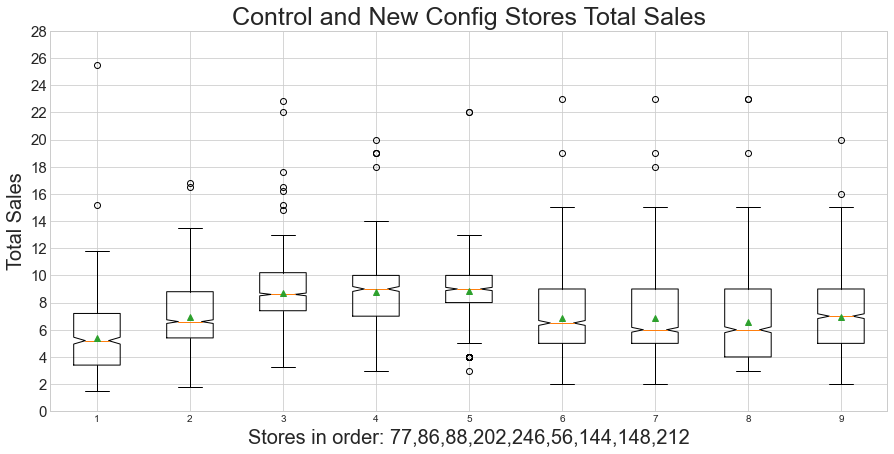

In [63]:
# New Config Stores
data_1 = df_77_new["TOT_SALES"] # Store 77
data_2 = df_86_new["TOT_SALES"] # Store 86
data_3 = df_88_new["TOT_SALES"] # Store 88

# Control Sales
data_4 = df_202_old["TOT_SALES"] # Store 202
data_5 = df_246_old["TOT_SALES"] # Store 246
data_6 = df_56_old["TOT_SALES"]  # Store 56
data_7 = df_144_old["TOT_SALES"] # Store 144
data_8 = df_148_old["TOT_SALES"] # Store 148
data_9 = df_212_old["TOT_SALES"] # Store 212

# Grouping the data
data_all = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9]

# Creating a boxplot
fig, ax = plt.subplots(figsize = (15,7))
pt = ax.boxplot(data_all, showmeans = True, notch = True)
ax.yaxis.set_ticks(np.arange(0,30,2));
ax.yaxis.set_tick_params(labelsize=15)

# Labels
ax.set(xlabel = "Stores in order: 77,86,88,202,246,56,144,148,212",
      ylabel = "Total Sales",
      title = "Control and New Config Stores Total Sales")

# Label Size
ax.title.set_size(25)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.show();

In [64]:
fig.savefig("img/Control-vs-New-Stores.png")

##### Boxplots to compare the stores(old vs new)

##### Store 77

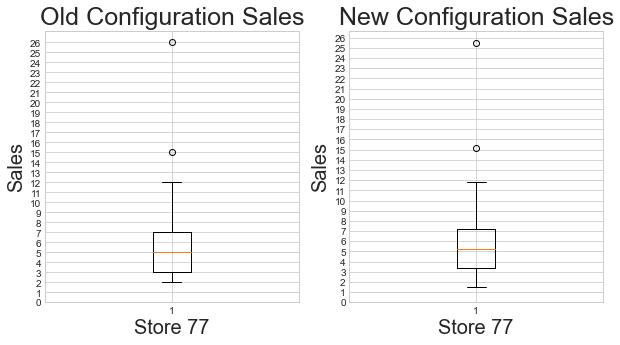

In [65]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax1.boxplot(df_77_old["TOT_SALES"])
ax2.boxplot(df_77_new["TOT_SALES"]);
ax1.yaxis.set_ticks(np.arange(0,27,1));
ax2.yaxis.set_ticks(np.arange(0,27,1));
ax1.set(title = "Old Configuration Sales",
       xlabel = "Store 77",
       ylabel = "Sales")
ax2.set(title = "New Configuration Sales",
       xlabel = "Store 77",
       ylabel = "Sales")
ax1.title.set_size(25)
ax1.xaxis.label.set_size(20)
ax1.yaxis.label.set_size(20)
ax2.title.set_size(25)
ax2.xaxis.label.set_size(20)
ax2.yaxis.label.set_size(20);

In [66]:
fig.savefig("img/Config-Store-77.png")

##### Store 86

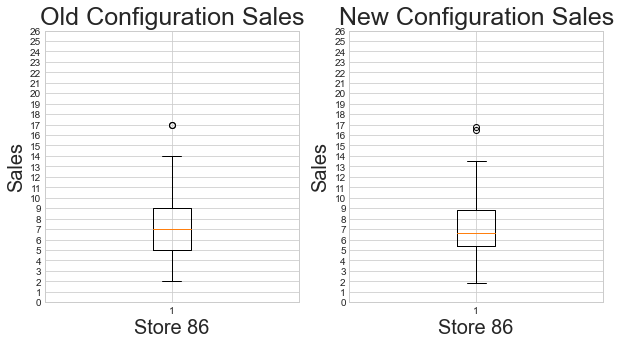

In [67]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax1.boxplot(df_86_old["TOT_SALES"])
ax2.boxplot(df_86_new["TOT_SALES"]);
ax1.yaxis.set_ticks(np.arange(0,27,1));
ax2.yaxis.set_ticks(np.arange(0,27,1));
ax1.set(title = "Old Configuration Sales",
       xlabel = "Store 86",
       ylabel = "Sales")
ax2.set(title = "New Configuration Sales",
       xlabel = "Store 86",
       ylabel = "Sales")
ax1.title.set_size(25)
ax1.xaxis.label.set_size(20)
ax1.yaxis.label.set_size(20)
ax2.title.set_size(25)
ax2.xaxis.label.set_size(20)
ax2.yaxis.label.set_size(20);

In [68]:
fig.savefig("img/Config-Store-86.png")

##### Store 88

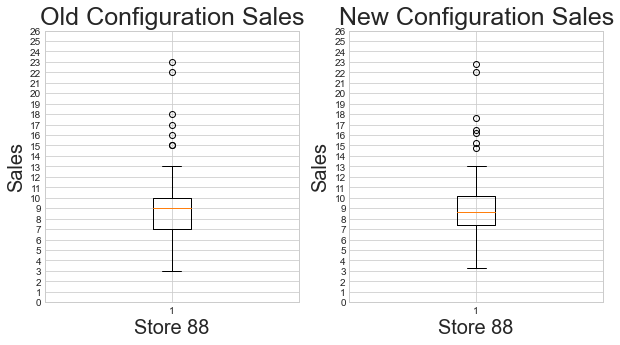

In [69]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax1.boxplot(df_88_old["TOT_SALES"])
ax2.boxplot(df_88_new["TOT_SALES"]);
ax1.yaxis.set_ticks(np.arange(0,27,1));
ax2.yaxis.set_ticks(np.arange(0,27,1));
ax1.set(title = "Old Configuration Sales",
       xlabel = "Store 88",
       ylabel = "Sales")
ax2.set(title = "New Configuration Sales",
       xlabel = "Store 88",
       ylabel = "Sales")
ax1.title.set_size(25)
ax1.xaxis.label.set_size(20)
ax1.yaxis.label.set_size(20)
ax2.title.set_size(25)
ax2.xaxis.label.set_size(20)
ax2.yaxis.label.set_size(20);

In [70]:
fig.savefig("img/Config-Store-88.png")

###### Task 2 dataset store number vs total sales revenue

##### Assesment of Trial

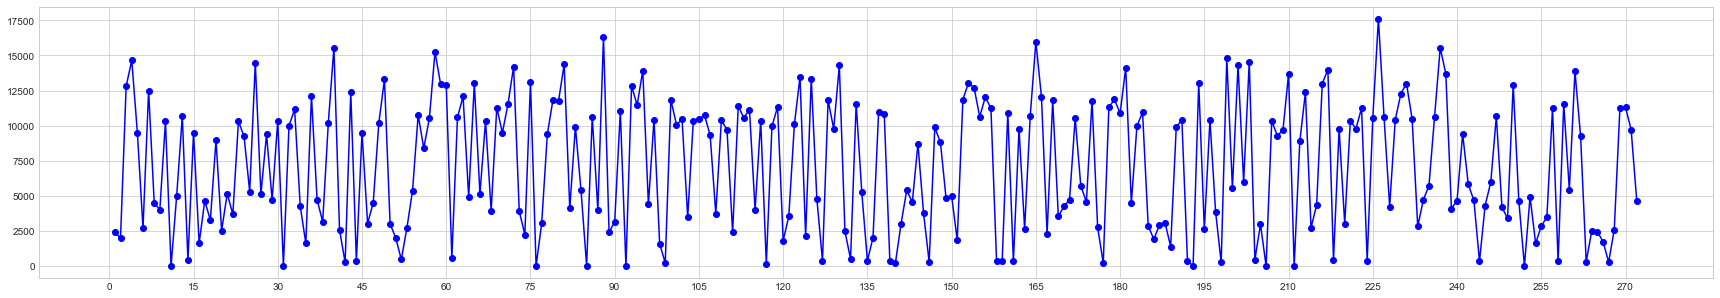

In [71]:
fig, ax = plt.subplots()
plt.plot(new_nbr_new, 'bo-')
plt.xticks(np.arange(0,273,15));

##### Using Task 1 and Task 2 dataset to compare store number vs total sales

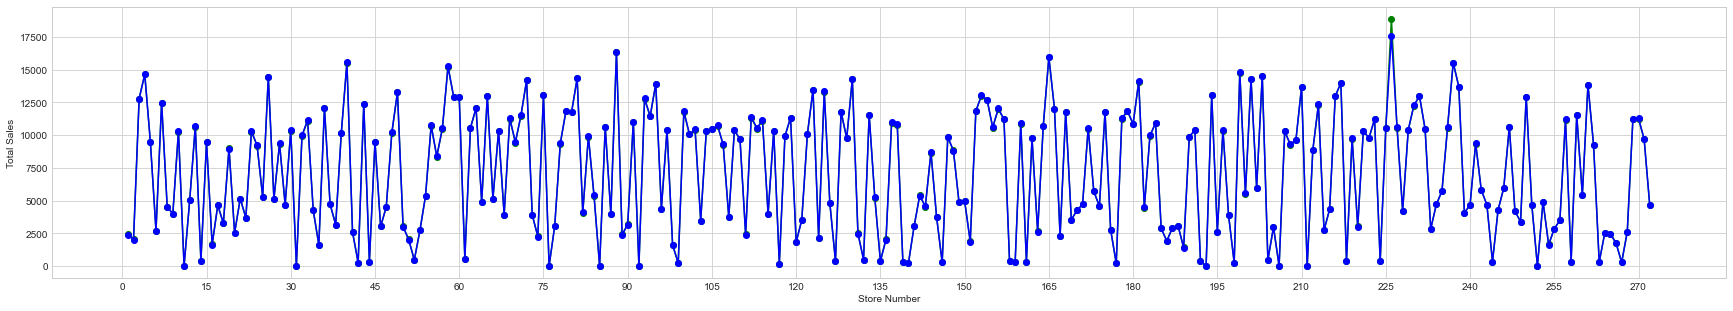

In [72]:
fig, ax = plt.subplots()
plt.plot(new_nbr, 'go-')
plt.plot(new_nbr_new, 'bo-')
plt.xticks(np.arange(0,273,15));
plt.xlabel("Store Number")
plt.ylabel("Total Sales");

Only Store 226 has different Total Sales

##### Collate Findings

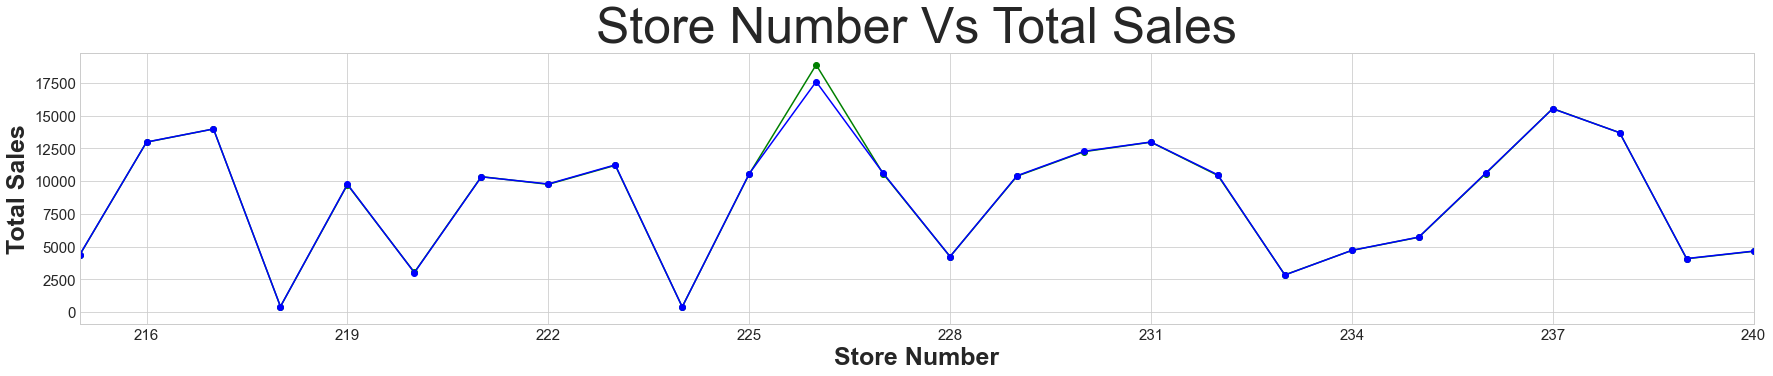

In [73]:
# Zoom in of above dataset
fig, ax = plt.subplots()
plt.plot(new_nbr, 'go-')
plt.plot(new_nbr_new, 'bo-')
plt.xticks(np.arange(0,273,3));
plt.xlim(215, 240);
plt.xlabel("Store Number", fontweight = "bold")
plt.ylabel("Total Sales", fontweight = "bold");
ax.set(title = "Store Number Vs Total Sales");
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.title.set_size(50)
ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25);

In [74]:
fig.savefig("img/Task-2-Store-Comparison.png")

* Store 226 had a new configuration that led to decreased sales revenue.
* Should revert back to old configuration for Store 226

## 4. Task 2 Findings

In [75]:
# total sales revenue
total_sales_revenue = taskdata.TOT_SALES.sum()
total_sales_revenue

1933114.9999999998

In [76]:
# find the total number of customers

# the total number of customer can be found and is equal to the max value in the LYLTY_CARD_NBR number
total_customers = taskdata["LYLTY_CARD_NBR"].max()
total_customers

2373711

In [77]:
# find the average transaction per customer

# count of the loyalty card number will give the number of transactions
count_customers = taskdata["LYLTY_CARD_NBR"].count()
count_customers

# average transaction per customer in the dataset
transaction_avg  = total_customers/count_customers
print(transaction_avg)

8.963014567615941


* Total Sales Revenue      = 1033115
* Total Customers          = 2372711
* Avg Transaction/Customer = 8.963014567615941

##### Control Stores Vs New Config Stores
![title](img/Control-vs-New-Stores.png)

##### Old Config Store 77 Sales > New Config Store 77 Sales
![title](img/Config-Store-77.png)

##### Old Config Store 86 Sales > New Config Store 86 Sales
![title](img/Config-Store-86.png)

##### Old Config Store 88 Sales < New Config Store 88 Sales
![title](img/Config-Store-88.png)

##### Store 226 had a new configuration that led to decreased sales revenue.
![title](img/Task-2-Store-Comparison.png)

##### Should revert back to old configuration for Store 226